# Module 5 - Verlet, Molecular Vibrations, and Interatomic Potentials

<img src="https://easyspin.org/455/_images/vib_displacement.png" width=400px>

## Goals

- Model a diatomic molecule using a molecular dynamics simulation

## Molecular vibrations

Let's use the Verlet method to explore the vibration of a simple diatomic molecule such as $N_2$. We can start by modeling the bond between the two atoms as a simple harmonic oscillator where the force is given by $F = -kx$ and the energy is $U=\frac{1}{2}kx^2$. Here, the equilibrium bond length corresponds to $x=0$

Using the Verlet method, we can explore the time evolution of the bond by integrating the equations of motion using the recursive formula 

\begin{equation}
    x(t + \Delta t) \approx 2x(t) - x(t - \Delta t) + a(t)(\Delta t)^2.
\end{equation}

We can write this equation more generally as

\begin{equation}
    x(t + \Delta t) \approx 2x(t) - x(t - \Delta t) + \frac{F(t)}{m}(\Delta t)^2
\end{equation}

or in discrete form

\begin{equation}
    x_{n+1} = 2x_n - x_{n-1} + \frac{F(x_n)}{m}(\Delta t)^2
\end{equation}

by noting that the acceleration is given by $a(t)=F(t)/m$, from Newton's second law.

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Start with the `Verlet` function you created during the last module to integrate the equations of motion of the harmonic spring. Modify this function so that it takes as an additional input another function `F` which computes the force acting on the spring. This will allow us to generalize the Verlet algorithm to use any force, not just the harmonic spring. This means that the input for your Verlet function is now `Verlet(x0, k, m, F, tmax, dt)`. Inside your Verlet function, you must pass the value of $x$ to your function `F` at a every iteration: `F(x[n],k)`. This is because the force depends on the value of $x$ at every iteration.

Create a separate `Fspring(x,k)` function that takes as input the current position and spring constant and returns the force. You can then use your Verlet function to get the time, positions, and velocities:     

`t,x,v = Verlet(x0, k, m, Fspring, tmax, dt)`
    
Make 3 plots:
<ul>
    <li>$x(t)$ vs $t$,</li>
    <li>$v(t)$ vs $t$,</li>
    <li>$v(t)$ vs $x(t)$.</li>
</ul>
    
The last plot is known as a phase space plot. It visualizes the possible configurational space that your system explores during the simulation.

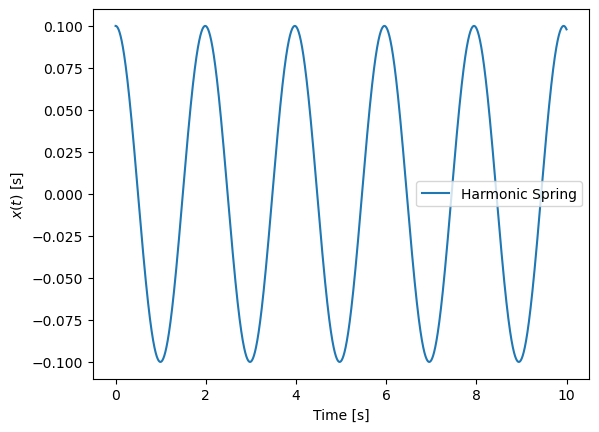

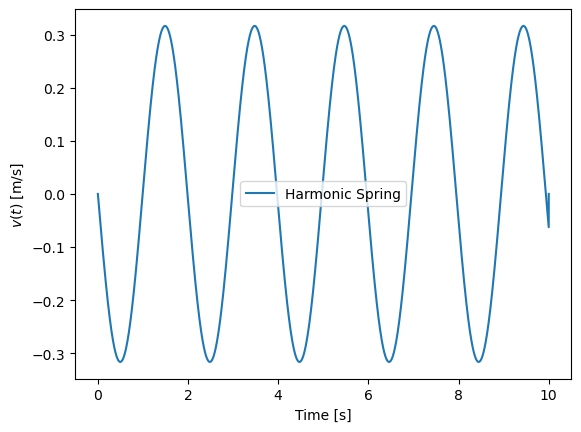

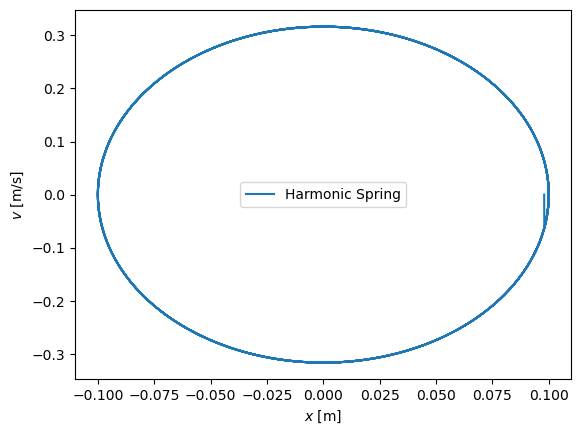

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.001 # s
tmax = 10 # s
x0 = 0.1 # m

## INSERT YOUR CODE HERE ##
def Fspring(x, k=1):
    return -k*x

def Verlet(x0, k, m, F, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    
    # Use Euler-Cromer method to find the solution for the first time step
    v[1] = v[0] +(F(x[0],k)/m)*x[0]*dt
    x[1] = x[0] + v[1]*dt

    # Use Verlet method to solve our equations from step 2 on
    for n in range(1,t.size-1):
        x[n+1] = 2*x[n] - x[n-1] + (F(x[n],k)/m)*dt**2
        v[n] = (x[n+1] - x[n-1])/(2.0*dt)
        
    return t,x,v

t,x,v = Verlet(x0, k, m, Fspring, tmax, dt)

plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, x, label='Harmonic Spring')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t)$ [s]')
plt.legend()

# Velocity vs time compared to analytical solution
plt.figure()
plt.plot(t, v, label='Harmonic Spring')
plt.xlabel('Time [s]')
plt.ylabel(r'$v(t)$ [m/s]')
plt.legend()

# Velocity vs position
plt.figure()
plt.plot(x, v, label='Harmonic Spring')
plt.xlabel(r'$x$ [m]')
plt.ylabel('$v$ [m/s]')
plt.legend()

## Forces from other interatomic potentials

Let us now consider other types of interatomic potentials. For example, bond vibrations can also be described using the so-called Morse potential:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Morse-potential.png" width=400px>

This potential is defined as

\begin{equation}
    V(x)=D \left( 1 - e^{-ax}\right)^2,
\end{equation}

which produces a force given by

\begin{equation}
    F(x) = -\frac{dV(x)}{dx} = -2aDe^{-ax} \left( 1-e^{-ax} \right)
\end{equation}

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Create a new function called `Fmorse(x,k)` function that computes the force given the equation above. To make it compatible with your previous Verlet function definition, use the spring constant `k` as input and inside the `Fmorse` function you can define the constants `a` and `D` as `D = 1` and `a = np.sqrt(k/2*D)`. Execute the verlet function again to get a new solution to the positions and velocities using the new force. 
    
Make 3 plots comparing the results from the harmonic and Morse potentials:
<ul>
    <li>$x(t)$ vs $t$,</li>
    <li>$v(t)$ vs $t$,</li>
    <li>$v(t)$ vs $x(t)$.</li>
</ul>
    
The last plot is known as a phase space plot. It visualizes the possible configurational space that your system explores during the simulation.

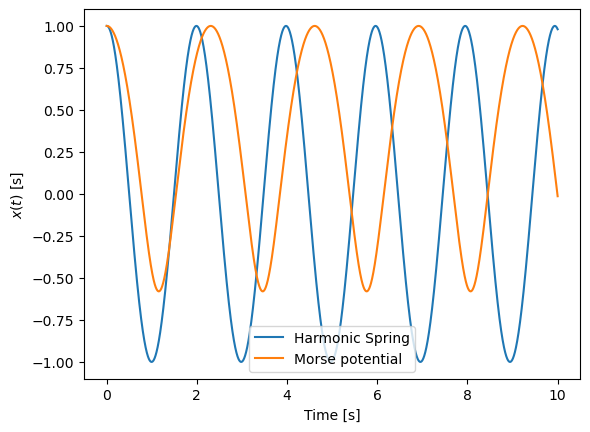

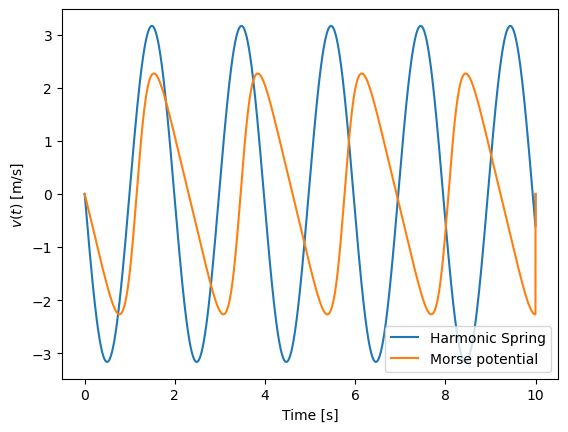

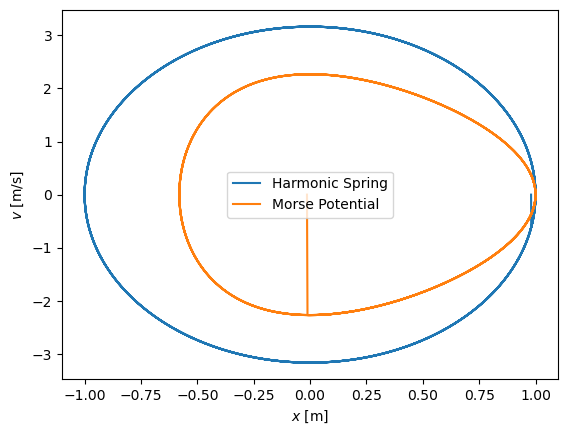

In [5]:
# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.001 # s
tmax = 10 # s
x0 = 1.0 # m

def Fmorse(x, k):
    D = 1
    a = np.sqrt(k/2*D)
    return -2*a*D*np.exp(-a*x)*(1-np.exp(-a*x))

def Verlet(x0, k, m, F, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    
    # Use Euler-Cromer method to find the solution for the first time step
    v[1] = v[0] -(F(x[0],k)/m)*x[0]*dt
    x[1] = x[0] + v[1]*dt

    # Use Verlet method to solve our equations from step 2 on
    for n in range(1,t.size-1):
        x[n+1] = 2*x[n] - x[n-1] + (F(x[n],k)/m)*dt**2
        v[n] = (x[n+1] - x[n-1])/(2.0*dt)
        
    return t,x,v

t,xH,vH = Verlet(x0, k, m, Fspring, tmax, dt)
t,xM,vM = Verlet(x0, k, m, Fmorse, tmax, dt)

plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, xH, label='Harmonic Spring')
plt.plot(t, xM, label='Morse potential')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t)$ [s]')
plt.legend()

# Velocity vs time compared to analytical solution
plt.figure()
plt.plot(t, vH, label='Harmonic Spring')
plt.plot(t, vM, label='Morse potential')
plt.xlabel('Time [s]')
plt.ylabel(r'$v(t)$ [m/s]')
plt.legend()

# Velocity vs position
plt.figure()
plt.plot(xH, vH, label='Harmonic Spring')
plt.plot(xM, vM, label='Morse Potential')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$v$ [m/s]')
plt.legend()

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Change your initial conditions by increasing the value of x0 from 0.1 to 1. How do the harmonic spring and Morse solutions compare for higher energies?

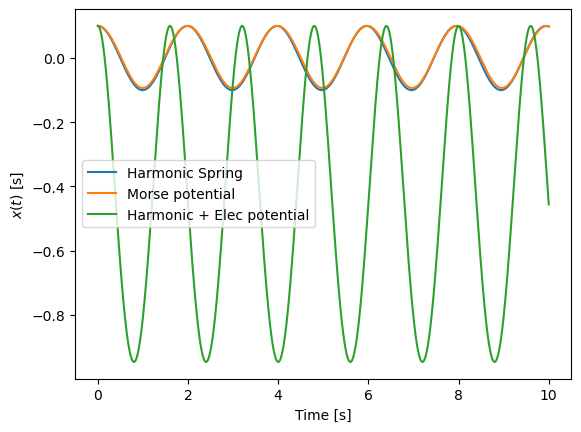

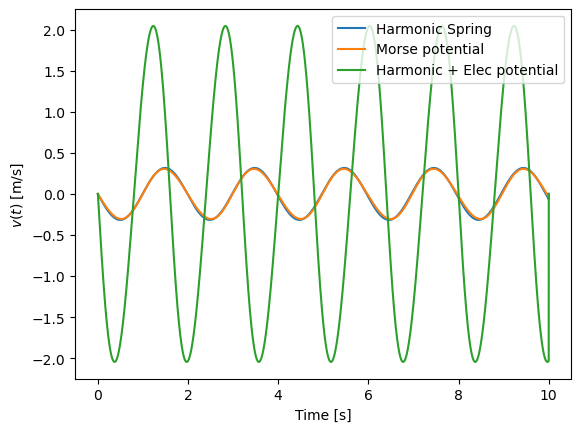

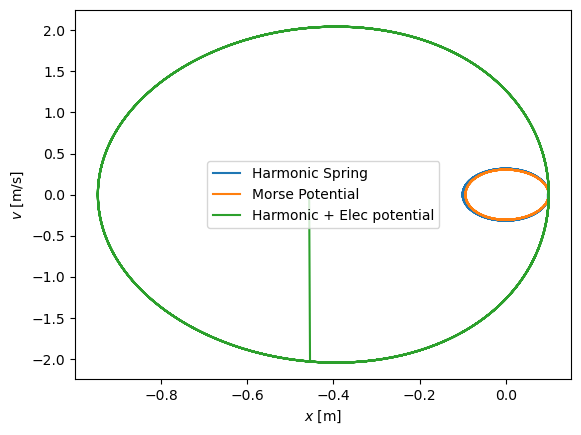

In [10]:
# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.001 # s
tmax = 10 # s
x0 = 0.1 # m

def Felec(x, k=1):
    q1 = -1
    q2 = 1
    r = 1.2 - x
    return -k*x + q1*q2/r**2

def Verlet(x0, k, m, F, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    
    # Use Euler-Cromer method to find the solution for the first time step
    v[1] = v[0] -(k/m)*x[0]*dt
    x[1] = x[0] + v[1]*dt

    # Use Verlet method to solve our equations from step 2 on
    for n in range(1,t.size-1):
        x[n+1] = 2*x[n] - x[n-1] + (F(x[n],k)/m)*dt**2
        v[n] = (x[n+1] - x[n-1])/(2.0*dt)
        
    return t,x,v

t,xE,vE = Verlet(x0, k, m, Felec, tmax, dt)

plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, xH, label='Harmonic Spring')
plt.plot(t, xM, label='Morse potential')
plt.plot(t, xE, label='Harmonic + Elec potential')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t)$ [s]')
plt.legend()

# Velocity vs time compared to analytical solution
plt.figure()
plt.plot(t, vH, label='Harmonic Spring')
plt.plot(t, vM, label='Morse potential')
plt.plot(t, vE, label='Harmonic + Elec potential')
plt.xlabel('Time [s]')
plt.ylabel(r'$v(t)$ [m/s]')
plt.legend()

# Velocity vs position
plt.figure()
plt.plot(xH, vH, label='Harmonic Spring')
plt.plot(xM, vM, label='Morse Potential')
plt.plot(xE, vE, label='Harmonic + Elec potential')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$v$ [m/s]')
plt.legend()